# Chaper 2 - N-armed Bandits
### Deep Reinforcement Learning _in Action_
Original source for the [Deep Reinforcement Learning in Action - Chapter 2 Notebook](https://github.com/DeepReinforcementLearning/DeepReinforcementLearningInAction/blob/master/Chapter%202/Ch2_book.ipynb)
  > Note: This notebook was originally created by the authors of "Deep Reinforcement Learning in Action" and is included here for pedagogical purposes. All credit goes to the original authors.



In [102]:
from typing import List


##### Listing 2.1

In [10]:
def get_best_action(actions: List[int]) -> int:
	"""Get the best action from a list of actions.
	
	Args:
		actions (List[int]): The list of actions to choose from.
		
	Returns:
		int: The index of the best action.
	"""
	best_action = 0
	max_action_value = 0
	for i in range(len(actions)): #A 
		cur_action_value = get_action_value(actions[i]) # This is the Q-value function for the action
		if cur_action_value > max_action_value:
			best_action = i
			max_action_value = cur_action_value
	return best_action

##### Listing 2.2

In [11]:
import numpy as np
import random
import matplotlib.pyplot as plt

n = 10
probs = np.random.rand(n) #A
eps = 0.1

##### Listing 2.3

In [12]:
def get_reward(prob: float, n: int = 10) -> int:
    """Generate a reward for the n-armed bandit game.
        This is a simple implementation of the probability 
        that takes a maximum reward and does 'n' trials and 
        compares to the probability 'prob' to see if it adds '1' to the reward.
    
    Args:
        prob (float): The probability attached to a particular arm to generate a reward.
        n (int): The maximum reward that can be attained in this game. In this implementation it is independent of the particular arm.
        
    """
    reward = 0;
    for i in range(n):
        if random.random() < prob:
            reward += 1
    return reward

As the code samples a uniform distribution, the result of the reward for a large number of tries will tend, by the law of large numbers, to `n*prob`.

In [13]:
reward_test = [get_reward(0.7) for _ in range(2000)]

In this case, as we have `prob=0.7` and `n=10`, the average reward after 2000 experiments will be close to `7`

In [14]:
np.mean(reward_test)

np.float64(6.995)

In [16]:
sum = 0
x = [4,5,6,7]
for j in range(len(x)): 
	sum = sum + x[j]
sum

22

Plotting the distribution, it can be seen that he average tends to `n*prob` which in this case is `7` but the distribution is wider and some times the reward will be below the average and sometimes over.

(array([  1.,  14.,  81., 199., 416., 527., 474., 230.,  58.]),
 array([ 2.        ,  2.88888889,  3.77777778,  4.66666667,  5.55555556,
         6.44444444,  7.33333333,  8.22222222,  9.11111111, 10.        ]),
 <BarContainer object of 9 artists>)

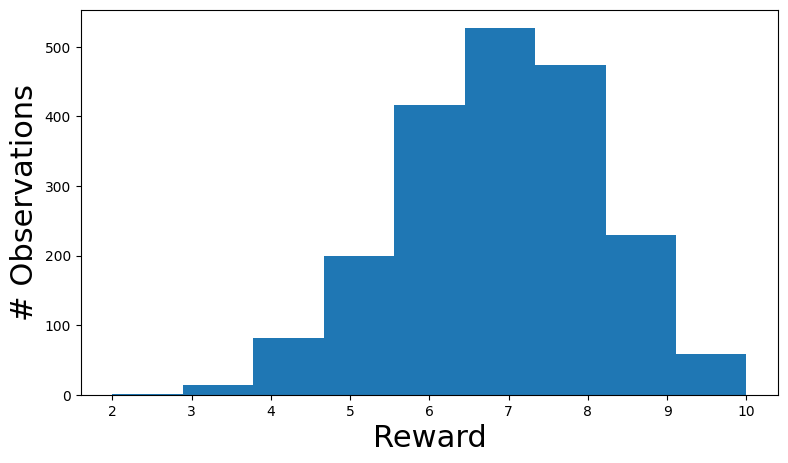

In [15]:
plt.figure(figsize=(9,5))
plt.xlabel("Reward",fontsize=22)
plt.ylabel("# Observations",fontsize=22)
plt.hist(reward_test,bins=9)

##### Listing 2.4

For the n-arm bandid we keep the reward in a matrix. The rows represent the actions. The first column will keep count of how many times that arm has been pulled, and the second column keeps track of the average reward.

In [31]:
# 10 actions x 2 columns
# Columns: # of times pulled, Avg Reward
record = np.zeros((n,2))

In [32]:
def get_best_arm(record: np.ndarray) -> int:
    """Get the best arm based on the average reward.
    Args:
        record (np.ndarray) [n actions, 2 columns]: The record of the actions 
                                                    # Columns: # of times pulled, Avg Reward
        
    Returns:
        int: The index of the best arm.
    """
    arm_index = np.argmax(record[:,1],axis=0)
    return arm_index

In [33]:
def update_record(record: np.ndarray, action: int, r: int) -> np.ndarray:
    """Update the record of the actions.
    Args:
        record (np.ndarray) [n actions, 2 columns]: The record of the actions 
                                                    # Columns: # of times pulled, Avg Reward
        action (int): The action to update the record for.
        r (int): The reward for the action.
    """
    # Compute the new average reward of the action
    new_r = (record[action,0] * record[action,1] + r) / (record[action,0] + 1)
    # Update the count of the action
    record[action,0] += 1
    # Update the average reward of the action
    record[action,1] = new_r
    return record

##### Listing 2.5

If we play the game `n` times, the starting point it that we have no idea about what arm will be the best arm to pull. As we play the game more times, we start gathering information in 'record', where we keep collecting the number of times we have pulled a particular arm and the average reward for each arm.

Long term, we would like to use the best arm. However, we don't know which one is the best arm a-priori. Hence, we need to do some exploration to understand which arm is the best. This is done with a 'probability_of_exploration=0.2', and we do this by drawing a uniformly distributed random number between `0` and `1`, and if this number is bigger than `probability_of_exploration` we exploit the best arm, otherwise we pick a random arm and gain some new information.

0.9680126484471145


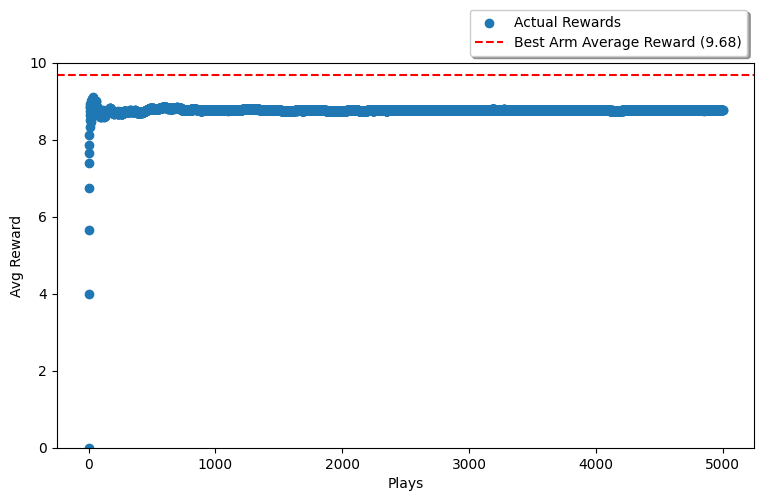

In [101]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
fig.set_size_inches(9,5)
rewards = [0]

probability_of_exploring = 0.002


number_of_plays = 5000
number_of_actions = 10

probs = np.random.rand(n) #A
# Get the probability of the best arm as that's going to determine the best reward and the best action
max_prob = np.max(probs)
print(max_prob)

def constant_probability_of_exploring(number_of_plays: int) -> float:
    return 0.2

def play_game(number_of_plays: int, probability_of_exploring: constant_probability_of_exploring) -> List[float]:
    """Play the game for a given number of plays with a given probability of exploring.
    Args:
        number_of_plays (int): The number of plays to play the game.
        probability_of_exploring (constant_probability_of_exploring): A function that encodes the probability of exploring.
                                                                    This is a function so that it can vary over time as the "agent" learns more 
                                                                    about the best arm.
    Returns:
        List[float]: The rewards for the game.
    """
    # Initialize the record of the actions to start with a clean slate
    # 10 actions x 2 columns
    # Columns: # of times pulled, Avg Reward
    record = np.zeros((n,2))
    # Play the game 500 times
    for i in range(number_of_plays):
        # With probability 1-probability_of_exploring, choose the best arm
        if random.random() > probability_of_exploring(i):
            choice = get_best_arm(record)
        else:
            # Choose a random arm with probability_of_exploring
            choice = np.random.randint(number_of_actions)
        r = get_reward(probs[choice])
        record = update_record(record,choice,r)
        mean_reward = ((i+1) * rewards[-1] + r)/(i+2)
        rewards.append(mean_reward)

    return rewards

def plot_results(rewards, max_prob):
    # Plot the average reward over the n plays of the game    
    ax.scatter(np.arange(len(rewards)), rewards, label='Actual Rewards')
    ax.axhline(y=max_prob*n, color='r', linestyle='--', label=f'Best Arm Average Reward ({max_prob*n:.2f})')
    ax.legend(
    loc='lower right',  # Position: 'upper right', 'upper left', 'lower right', 'lower left', 'center', etc.
    bbox_to_anchor=(1.0, 1.0),  # Fine-tune position
    frameon=True,  # Add a frame
    shadow=True,  # Add shadow
    )
    ax.set_ylim(0, 10)

rewards = play_game(number_of_plays, constant_probability_of_exploring)
plot_results(rewards, max_prob)


The image above shows what the result of the experiment is starting with zero information, as we reset 'reward' with every attempt. The 'probs' is usually set to random but in this case, I am freezing it to

'''
probs=[0.46307584, 0.58492433, 0.68362618, 0.49134106, 0.52871027,
       0.24736295, 0.1014495 , 0.66554949, 0.07273855, 0.89138766]
'''
This is done so that I can write an interpretation of the result without having to worry too much about  

In [61]:
probs

array([0.46307584, 0.58492433, 0.68362618, 0.49134106, 0.52871027,
       0.24736295, 0.1014495 , 0.66554949, 0.07273855, 0.89138766])

##### Listing 2.6

In [13]:
def softmax(av, tau=1.12):
    softm = ( np.exp(av / tau) / np.sum( np.exp(av / tau) ) )
    return softm

In [14]:
probs = np.random.rand(n)
record = np.zeros((n,2))

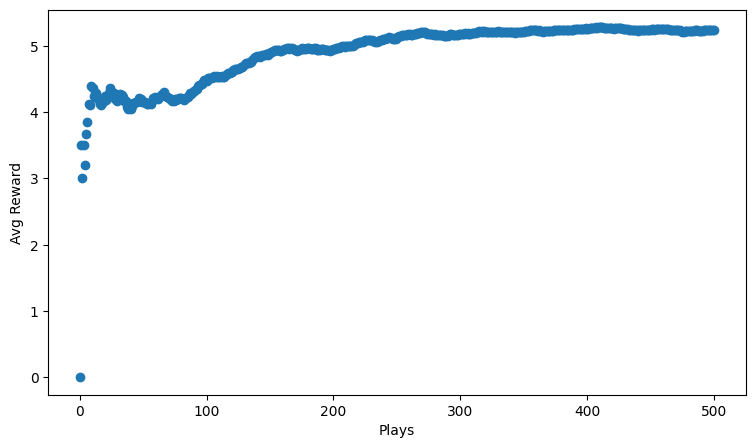

In [15]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
fig.set_size_inches(9,5)
rewards = [0]
for i in range(500):
    p = softmax(record[:,1],tau=0.7)
    choice = np.random.choice(np.arange(n),p=p)
    r = get_reward(probs[choice])
    record = update_record(record,choice,r)
    mean_reward = ((i+1) * rewards[-1] + r)/(i+2)
    rewards.append(mean_reward)
ax.scatter(np.arange(len(rewards)),rewards)

##### Listing 2.9

In [16]:
class ContextBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.init_distribution(arms)
        self.update_state()
        
    def init_distribution(self, arms):
        # Num states = Num Arms to keep things simple
        self.bandit_matrix = np.random.rand(arms,arms)
        #each row represents a state, each column an arm
        
    def reward(self, prob):
        reward = 0
        for i in range(self.arms):
            if random.random() < prob:
                reward += 1
        return reward
        
    def get_state(self):
        return self.state
    
    def update_state(self):
        self.state = np.random.randint(0,self.arms)
        
    def get_reward(self,arm):
        return self.reward(self.bandit_matrix[self.get_state()][arm])
        
    def choose_arm(self, arm):
        reward = self.get_reward(arm)
        self.update_state()
        return reward

In [17]:
import numpy as np
import torch

arms = 10
N, D_in, H, D_out = 1, arms, 100, arms

In [18]:
env = ContextBandit(arms=10)
state = env.get_state()
reward = env.choose_arm(1)
print(state)

3


In [19]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
    torch.nn.ReLU(),
)

In [20]:
loss_fn = torch.nn.MSELoss()

In [21]:
env = ContextBandit(arms)

In [22]:
def one_hot(N, pos, val=1):
    one_hot_vec = np.zeros(N)
    one_hot_vec[pos] = val
    return one_hot_vec

In [23]:
def running_mean(x,N=50):
    c = x.shape[0] - N
    y = np.zeros(c)
    conv = np.ones(N)
    for i in range(c):
        y[i] = (x[i:i+N] @ conv)/N
    return y

In [24]:
def train(env, epochs=5000, learning_rate=1e-2):
    cur_state = torch.Tensor(one_hot(arms,env.get_state())) #A
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    rewards = []
    for i in range(epochs):
        y_pred = model(cur_state) #B
        av_softmax = softmax(y_pred.data.numpy(), tau=2.0) #C
        av_softmax /= av_softmax.sum() #D
        choice = np.random.choice(arms, p=av_softmax) #E
        cur_reward = env.choose_arm(choice) #F
        one_hot_reward = y_pred.data.numpy().copy() #G
        one_hot_reward[choice] = cur_reward #H
        reward = torch.Tensor(one_hot_reward)
        rewards.append(cur_reward)
        loss = loss_fn(y_pred, reward)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        cur_state = torch.Tensor(one_hot(arms,env.get_state())) #I
    return np.array(rewards)

In [25]:
rewards = train(env)

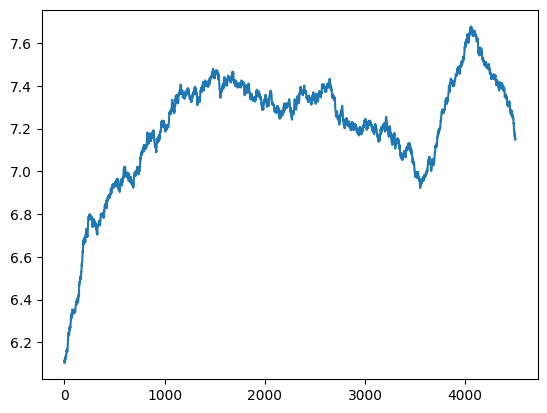

In [26]:
plt.plot(running_mean(rewards,N=500))